In [0]:
import tensorflow as tf

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [0]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

In [4]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [5]:
train_images.shape

(50000, 32, 32, 3)

In [6]:
train_labels.shape

(50000, 1)

In [7]:
print(train_labels)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [0]:
train_images, test_images = train_images/255.0, test_images/255.0
train_labels, test_labels = train_labels.flatten(), test_labels.flatten()

In [9]:
print("train_images.shape:", train_images.shape)
print("train_labels.shape", train_labels.shape)

train_images.shape: (50000, 32, 32, 3)
train_labels.shape (50000,)


In [10]:
print(train_labels)

[6 9 9 ... 9 1 1]


In [11]:
# number of classes
K = len(set(train_labels))
print(K)

10


In [0]:
# Build the model using the functional API
i = Input(shape=train_images[0].shape)
x = Conv2D(32, (3,3), activation="relu", padding="same")(i)
x = Conv2D(64, (3,3), activation="relu", padding="same")(x)
x = Conv2D(128, (3,3), activation="relu", padding="same")(x)

x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)

model = Model(i, x)

In [0]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [15]:
r = model.fit(
    train_images,
    train_labels,
    validation_data=(test_images, test_labels),
    epochs=20
)

Epoch 1/20
1563/1563 [==============================] - 87s 55ms/step - loss: 1.4278 - accuracy: 0.4922 - val_loss: 1.0749 - val_accuracy: 0.6170
Epoch 2/20
1563/1563 [==============================] - 86s 55ms/step - loss: 0.9900 - accuracy: 0.6492 - val_loss: 0.9560 - val_accuracy: 0.6649
Epoch 3/20
1563/1563 [==============================] - 86s 55ms/step - loss: 0.7329 - accuracy: 0.7434 - val_loss: 0.9175 - val_accuracy: 0.6800
Epoch 4/20
1563/1563 [==============================] - 86s 55ms/step - loss: 0.4810 - accuracy: 0.8335 - val_loss: 0.9642 - val_accuracy: 0.6821
Epoch 5/20
1563/1563 [==============================] - 86s 55ms/step - loss: 0.2958 - accuracy: 0.8988 - val_loss: 1.0833 - val_accuracy: 0.6971
Epoch 6/20
1563/1563 [==============================] - 86s 55ms/step - loss: 0.2071 - accuracy: 0.9304 - val_loss: 1.2187 - val_accuracy: 0.6863
Epoch 7/20
1563/1563 [==============================] - 86s 55ms/step - loss: 0.1712 - accuracy: 0.9429 - val_loss: 1.2216 -

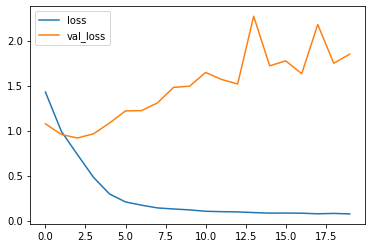

In [16]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

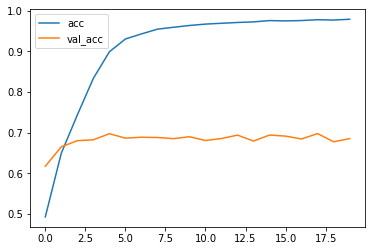

In [17]:
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()

Confusion matrix, without normalization
[[766  25  38  19  21  15   8  22  51  35]
 [ 21 849   3   4   2   9   5   5  14  88]
 [ 90  13 527  42 109  87  56  52  12  12]
 [ 23  21  77 369 101 227  65  64  18  35]
 [ 26   5  67  44 628  63  45 106   6  10]
 [ 17   8  55 102  60 624  32  80   7  15]
 [  9  16  62  35  53  36 755  21   5   8]
 [ 15   4  33  22  53  61   8 794   2   8]
 [ 92  60   8  10   7   9   7  10 772  25]
 [ 34 103  11   9   7  12   6  21  30 767]]


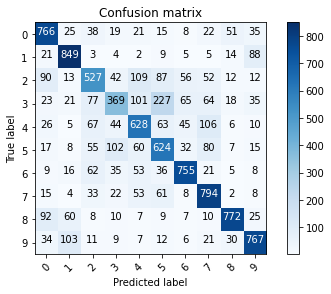

In [18]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(test_images).argmax(axis=1)
cm = confusion_matrix(test_labels, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [0]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

In [0]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != test_labels)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(test_images[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[test_labels[i]], labels[p_test[i]]));